In [1]:
%matplotlib inline
import os
import cv2
import nltk
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, WordPunctTokenizer
from nltk.tokenize.treebank import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer 
from gensim import corpora, models, similarities
from sklearn.cluster import KMeans
from numpy import array
from PIL import Image
from pylab import *

/Users/michellechen/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using Theano backend.


In [21]:
clothing_df = pd.read_csv('CLOTHING.csv')

print clothing_df.values

[[468 'Denim Shorts High waist'
  'Short 5-pocket shorts in washed denim with distressed details, a high waist, and raw-edge hems.'
  '100% cotton.' 'Dark denim blue']
 [469 'Denim Shorts High waist'
  'Short 5-pocket shorts in washed denim with distressed details, a high waist, and raw-edge hems.'
  '87% cotton, 10% rayon, 3% spandex.' 'Light denim blue']
 [470 'Short-sleeved Top' 'Short-sleeved top in soft jersey.' '100% rayon.'
  'White']
 ..., 
 [1407 'Chiffon Blouse'
  'Short-sleeved blouse in chiffon with a printed pattern. Low-cut V-neck at back with tie at back of neck. Lined.'
  '100% polyester.' 'White/Patterned']
 [1408 'Satin Maxi Dress'
  'Sleeveless maxi dress in woven satin fabric with burnout details. V-neck at front and back, narrow adjustable shoulder straps, and elasticized seam at waist. Unlined.'
  '63% rayon, 37% polyester.' 'Dark purple']
 [1409 'Beaded Chiffon Dress'
  'Long, sleeveless dress in chiffon with beaded embroidery at front of bodice. Seam at waist wi

In [31]:
print clothing_df.loc[0][0]
print clothing_df.loc[0][1]
print clothing_df.loc[0][2]
print clothing_df.loc[0][3]
print clothing_df.loc[0][4]

468
Denim Shorts High waist
Short 5-pocket shorts in washed denim with distressed details, a high waist, and raw-edge hems.
100% cotton.
Dark denim blue


In [23]:
pair_df = pd.read_csv('PAIR.csv')

print pair_df

      pairA  pairB
0         1    158
1         1    502
2         2    158
3         2    502
4         3    624
5         3    123
6         3    166
7         4    123
8         4    624
9         4    166
10        5    166
11        5    624
12        5    123
13        6    119
14        6    717
15        7    119
16        7    717
17        8    118
18        8     37
19        8    232
20        8    578
21        9      4
22       10      4
23       25    145
24       26    145
25       27    620
26       29    125
27       29    125
28       29    717
29       29     96
...     ...    ...
1892    921    578
1893    921    919
1894    922    886
1895    922    918
1896    922    941
1897    923    941
1898    923    886
1899    923    918
1900    924    923
1901    924    922
1902    927    169
1903    928    644
1904    930    689
1905    930    697
1906    931    918
1907    931    113
1908    932     97
1909    932    118
1910    932     88
1911    932     97
1912    933 

In [30]:
print len(pair_df)
print pair_df.loc[0][0], pair_df.loc[0][1]

1922
1 158


In [61]:
article = []

for i in xrange(len(pair_df)):
    pairA = pair_df.loc[i][0]
    pairB = pair_df.loc[i][1]
    
    s = clothing_df.loc[pairA-1][1]+" "+clothing_df.loc[pairA-1][2]+" "+clothing_df.loc[pairA-1][3]+" "+clothing_df.loc[pairA-1][4]+" "+clothing_df.loc[pairB-1][1]+" "+clothing_df.loc[pairB-1][2]+" "+clothing_df.loc[pairB-1][3]+" "+clothing_df.loc[pairB-1][4] 
    
    article.append(s)

In [62]:
print article[0]

Denim Shorts High waist Short 5-pocket shorts in washed denim with distressed details, a high waist, and raw-edge hems. 100% cotton. Dark denim blue Short Jersey Tank Top Short tank top in jersey with narrow shoulder straps. 100% rayon. Gray


In [63]:
# remove stop words and tokenize
english_stopwords = stopwords.words('english')
one_words = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'top']

article = [[word for word in TreebankWordTokenizer().tokenize(description.lower()) if word.isalpha() and word not in english_stopwords] for description in article]
article = [[word for word in description if word not in one_words] for description in article]

In [64]:
print article[0]

['denim', 'shorts', 'high', 'waist', 'short', 'shorts', 'washed', 'denim', 'distressed', 'details', 'high', 'waist', 'dark', 'denim', 'blue', 'short', 'jersey', 'tank', 'short', 'tank', 'jersey', 'narrow', 'shoulder', 'gray']


In [65]:
dictionary = corpora.Dictionary(article)
print dictionary.token2id

{u'lace': 166, u'chain': 258, u'knotted': 463, u'yellow': 283, u'gusset': 413, u'lining': 159, u'burnout': 409, u'armholes': 187, u'marks': 266, u'lapels': 353, u'premium': 490, u'sequins': 467, u'leggings': 328, u'hems': 173, u'unlined': 146, u'cool': 270, u'button': 43, u'sculpt': 450, u'biker': 239, u'teal': 207, u'small': 97, u'woven': 79, u'round': 350, u'upper': 141, u'smaller': 472, u'pleat': 165, u'draping': 390, u'design': 147, u'pajamas': 388, u'ribbon': 417, u'blue': 0, u'cargo': 289, u'section': 204, u'halterneck': 403, u'elasticized': 36, u'ruffle': 125, u'camisole': 150, u'leg': 298, u'gathered': 415, u'neckline': 54, u'textured': 249, u'chino': 287, u'studs': 235, u'boy': 389, u'distressed': 4, u'larger': 320, u'bow': 395, u'jegging': 428, u'narrow': 8, u'pajama': 144, u'adjustable': 60, u'mobility': 332, u'straw': 219, u'taupe': 91, u'strap': 225, u'visible': 213, u'motif': 386, u'bra': 226, u'zip': 98, u'sweater': 362, u'two': 327, u'sports': 293, u'handles': 318, u'mi

In [66]:
corpus = [dictionary.doc2bow(description) for description in article]
print corpus

[[(0, 1), (1, 1), (2, 3), (3, 1), (4, 1), (5, 1), (6, 2), (7, 2), (8, 1), (9, 3), (10, 2), (11, 1), (12, 2), (13, 2), (14, 1)], [(0, 2), (1, 1), (2, 6), (3, 1), (4, 2), (6, 2), (9, 2), (10, 4), (13, 3), (14, 2), (15, 1), (16, 1), (17, 1)], [(0, 1), (2, 3), (3, 1), (4, 1), (5, 1), (6, 2), (7, 2), (8, 1), (9, 3), (10, 2), (11, 1), (12, 2), (13, 2), (14, 1), (16, 1), (18, 1), (19, 1)], [(0, 2), (2, 6), (3, 1), (4, 2), (6, 2), (9, 2), (10, 4), (13, 3), (14, 2), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1)], [(0, 1), (2, 2), (3, 1), (4, 1), (14, 1), (15, 1), (16, 1), (18, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)], [(0, 1), (2, 1), (14, 1), (17, 1), (18, 1), (25, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 1)], [(7, 2), (9, 1), (18, 1), (25, 1), (28, 1), (35, 1), (36, 1), (37, 2)], [(0, 1), (2, 1), (14, 1), (17, 1), (18, 1), (25, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1)], [(0, 1), (2, 2), (3, 1), (4, 1), (1

In [67]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
for doc in corpus_tfidf: 
    print doc

[(0, 0.11837550028317129), (1, 0.15051434467192762), (2, 0.38848843519561854), (3, 0.20624309270332397), (4, 0.1540835265958682), (5, 0.205836945092507), (6, 0.5354336117975372), (7, 0.14379419251700648), (8, 0.18438376893877945), (9, 0.23523935793867412), (10, 0.2616652631366465), (11, 0.17441683522375262), (12, 0.36295851370605653), (13, 0.2515454093838896), (14, 0.11470764607287853)]
[(0, 0.18225478659554523), (1, 0.1158684005648521), (2, 0.5981294835674753), (3, 0.15876930090065827), (4, 0.23723203019578945), (6, 0.4121855384805299), (9, 0.12072739960950966), (10, 0.4028683855895514), (13, 0.2904656461642051), (14, 0.17660763845457547), (15, 0.1296179054058404), (16, 0.1368215228204485), (17, 0.12749769023113935)]
[(0, 0.11604751683833243), (2, 0.3808483860006136), (3, 0.20218709712757427), (4, 0.1510533058307648), (5, 0.2017889368529196), (6, 0.5249037252830712), (7, 0.1409663227395374), (8, 0.18075766082891162), (9, 0.23061311915154556), (10, 0.25651933007436306), (11, 0.17098673

In [115]:
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=10)

for i in lsi.print_topics(10):
    print i
    print "\n"

-0.369*"denim" + -0.232*"shorts" + -0.194*"jacket" + -0.181*"short" + -0.176*"button" + -0.168*"pockets" + -0.167*"dress" + -0.160*"jersey" + -0.150*"washed" + -0.149*"tank"


-0.324*"denim" + -0.230*"jacket" + 0.221*"bra" + -0.220*"button" + 0.216*"sports" + 0.191*"lace" + 0.166*"tank" + 0.140*"briefs" + -0.135*"pockets" + -0.135*"tab"


0.270*"bra" + -0.250*"pants" + 0.237*"jacket" + 0.231*"sports" + -0.218*"cardigan" + 0.199*"denim" + 0.198*"button" + 0.156*"lace" + 0.150*"microfiber" + -0.150*"twill"


-0.389*"pants" + -0.364*"sports" + 0.247*"cardigan" + -0.205*"functional" + -0.200*"slim" + 0.186*"dress" + -0.183*"legs" + -0.174*"superstretch" + -0.167*"tights" + -0.162*"twill"


0.304*"dress" + 0.296*"sports" + -0.227*"pants" + 0.181*"jacket" + -0.172*"shorts" + -0.167*"twill" + 0.167*"sleeveless" + -0.167*"regular" + 0.165*"functional" + -0.165*"bras"


0.526*"cardigan" + -0.234*"dress" + 0.233*"round" + 0.232*"sports" + -0.212*"sleeveless" + -0.207*"blouse" + 0.205*"hem" + 0.1

In [69]:
corpus_lsi = lsi[corpus_tfidf]
for doc in corpus_lsi:
    print doc

[(0, 0.52373727326380604), (1, 0.015854411987468148), (2, -0.005732398168533299), (3, 0.023675934468052301), (4, -0.13147015485543401), (5, -0.1414343187282312), (6, -0.48756666265930498), (7, -0.062929546422989452), (8, -0.096422186070278706), (9, -0.24166030357607529)]
[(0, 0.56595770944380608), (1, -0.23579981050426976), (2, -0.10135008782767593), (3, 0.074663472452660917), (4, -0.244973919766522), (5, -0.17443276843024325), (6, -0.41570801251475037), (7, 0.057466706993640808), (8, -0.19611415292240642), (9, -0.062407305302470406)]
[(0, 0.53396952266552489), (1, 0.015924330334366688), (2, -0.0039241321441509033), (3, 0.020214727556856812), (4, -0.13412495550231984), (5, -0.14607074245821719), (6, -0.48402819355192095), (7, -0.058513409209308184), (8, -0.095241070347339085), (9, -0.22261322593278327)]
[(0, 0.56497910317131717), (1, -0.22858103130732321), (2, -0.09708008871413773), (3, 0.070186639346142901), (4, -0.24177063915290303), (5, -0.17496172527095039), (6, -0.4081057196384977

In [76]:
index = similarities.MatrixSimilarity(lsi[corpus])

In [112]:
query = "sports" 
query_bow = dictionary.doc2bow(query.lower().split()) 
query_lsi = lsi[query_bow]
sims = index[query_lsi]
sort_sims = sorted(enumerate(sims), key=lambda item: -item[1]) 
print sort_sims[0:10]

[(1141, 0.98222268), (1143, 0.98025554), (1147, 0.98025554), (1606, 0.98025554), (1609, 0.98025554), (1611, 0.98025554), (1682, 0.97811681), (1142, 0.97794706), (1145, 0.97789824), (1596, 0.97789824)]


Rank 0


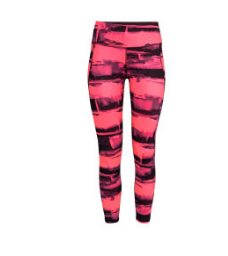

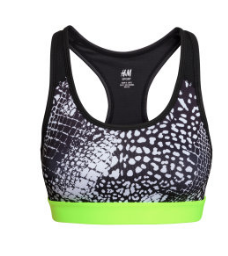

Rank 1


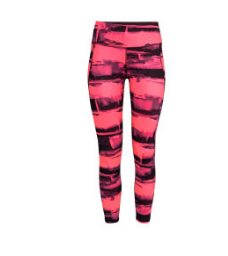

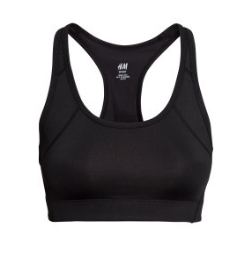

Rank 2


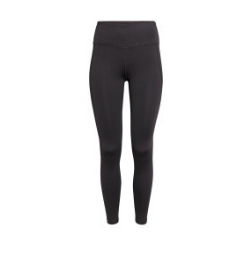

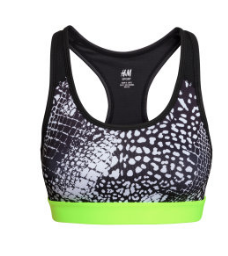

Rank 3


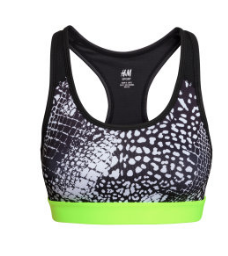

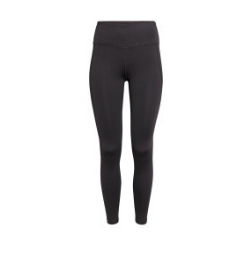

Rank 4


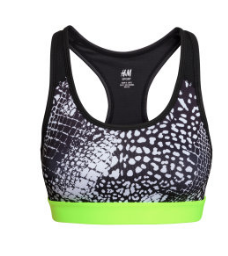

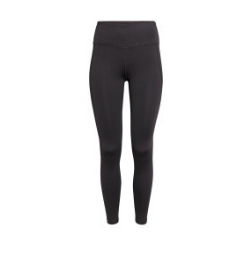

Rank 5


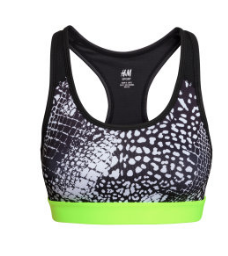

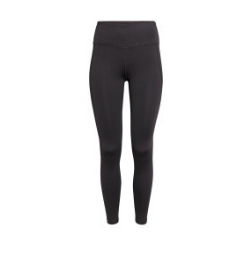

Rank 6


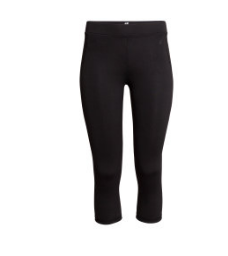

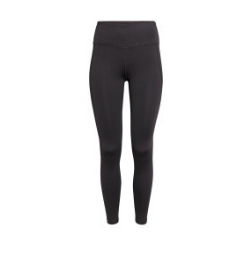

Rank 7


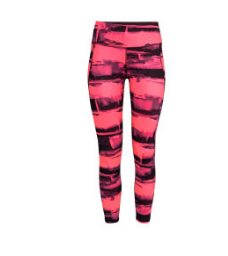

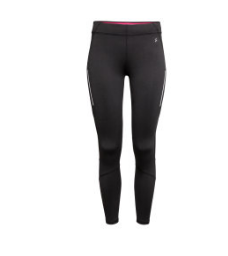

Rank 8


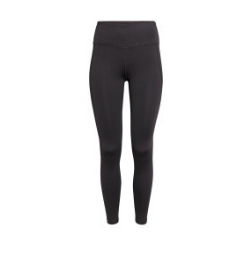

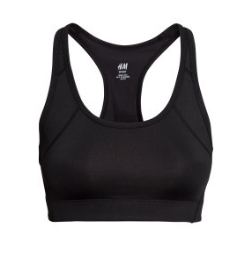

Rank 9


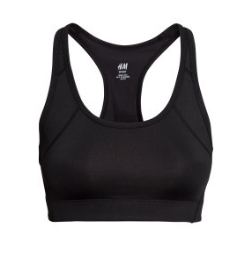

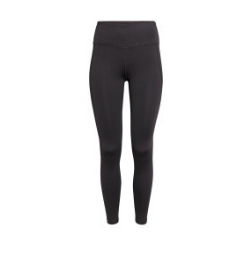

In [113]:
for i in xrange(10):
    pairA = pair_df.loc[sort_sims[i][0]][0]
    pairB = pair_df.loc[sort_sims[i][0]][1]
    
    print "Rank " + str(i)
    
    # Draw out the clothing and their HOG
    figure()
    imshow(array(Image.open('summer clothing/' + str(pairA) + '.jpg')))
    axis('off')
    plt.show()

    figure()
    imshow(array(Image.open('summer clothing/' + str(pairB) + '.jpg')))
    axis('off')
    plt.show()